<a href="https://colab.research.google.com/github/SomyaH99/Data_analysis_0f_Hotel_bookings/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
%matplotlib inline



In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Hotel Booking Analysis/Hotel Bookings.csv'
df = pd.read_csv(path)

Lets Explore our Data

In [4]:
# Making a copy of the data so that there's no change in the original Dataset
df1 = df.copy()

In [5]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df1.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
print(df1.shape)


(119390, 32)


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Explanation of Dataset

In [13]:
df1_descr = []
j = 0
for name in df.columns:
  df1_descr.append(
      [
       name,
       df1[name].dtypes,
       df1[name].isnull().sum(),
       round(df[name].isnull().sum()/len(df)*100, 2),
       df1[name].nunique(),
       df1[name].unique(),
       
       ]
       )
  j += 1

df_columns_desc = pd.DataFrame(df1_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
# print(f"Total column of this data set is: {len(df.columns)} columns.")
df_columns_desc

,Column,Dtype,Null,Null (%),nUnique,Unique
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.00,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


Steps to Clean our Data :-

1. Firstly, Changing the column name to make our data more comrehensive
2. Second step is to remove the duplicate rows
3. Third step is to drop the columns which will not be required for the further analysis.
4. Fourth stpe is to treat the null or missing values 
5. Next step is changing the data type of the required columns  
6. Last but not the least we have to treat the outliers
7. And lastly merging the columns (e.g. [booking_day, booking_month, booking_year], [no_of_adults, no_of_children, no_of_babies] and [stays_in_weekend_nights,  stays_in_week_nights]) for better insights.


               1.Changing the column name to make our data more comprehensive



In [16]:
# Changing the names of some columns
df1.columns=['hotel','booking_cancel_status','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
             'stays_in_weekend_nights','stays_in_week_nights','no_of_adults','no_of_children','no_of_babies','meal_type','country','market_segment',
             'distribution_channel','repeated_guest_status','no_of_previous_cancellations','no_of_previous_booking_not_cancelled',
             'reserved_room_type','assigned_room_type','no_of_booking_changes','deposit_type','agent_id','company_id',
             'no_of_days_in_waiting_list','customer_type','adr','required_no_of_car_parking_space',
             'total_no_of_special_requests','reservation_status','reservation_status_date']

                2.Removing the duplicate rows.

In [18]:
# Number of duplicate rows
df1[df1.duplicated()].shape

(31994, 32)

In [19]:
# dropping the duplicate rows
df1.drop_duplicates(inplace= True)

                  3.dropping the columns which will not be required for the further analysis.

In [20]:
# we will drop the  market_segment, company_id and agent_id columns
df1.drop(['market_segment'],axis=1,inplace=True)
df1.drop(['company_id'],axis=1,inplace=True)
df1.drop(['agent_id'],axis=1,inplace=True)

In [22]:
# shape after cleaning the data
df1.shape

(87396, 29)

                        4.Checking and treating the missing values of our dataset


In [ ]:
df1.info()

In [24]:
df1.isnull().sum()

hotel                                     0
booking_cancel_status                     0
lead_time                                 0
arrival_date_year                         0
arrival_date_month                        0
arrival_date_week_number                  0
arrival_date_day_of_month                 0
stays_in_weekend_nights                   0
stays_in_week_nights                      0
no_of_adults                              0
no_of_children                            4
no_of_babies                              0
meal_type                                 0
country                                 452
distribution_channel                      0
repeated_guest_status                     0
no_of_previous_cancellations              0
no_of_previous_booking_not_cancelled      0
reserved_room_type                        0
assigned_room_type                        0
no_of_booking_changes                     0
deposit_type                              0
no_of_days_in_waiting_list      

--> There are null values in no_of_children and country column 

In [26]:
# Replacing null value in no_of_children column with MEAN of no_of_children column
df1['no_of_children']=df1.no_of_children.fillna(df1.no_of_children.mean())  


In [27]:
# Replacing null values in company column with others
df1['country']=df1.country.fillna('others')

Checking the missing values again


In [ ]:
df1.isnull().sum()

                           5.Changing the data type of the required column

In [32]:
# changing the datatype of different columns 
df1['no_of_children'] = df1['no_of_children'].astype('int64')
df1['reservation_status_date'] = df1['reservation_status_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d')) 



In [37]:
#Converting year, month and date into string 
df1['arrival_month_year']=df1[['arrival_date_month','arrival_date_year']].astype('str').apply(lambda x: '-'.join(x),axis=1)

In [38]:
# Converting booking_date column from str to datetime type.
df1['arrival_month_year']=df1['arrival_month_year'].apply(lambda x : datetime.strptime(x,'%B-%Y'))

                    6.Checking And dealing with the outliers

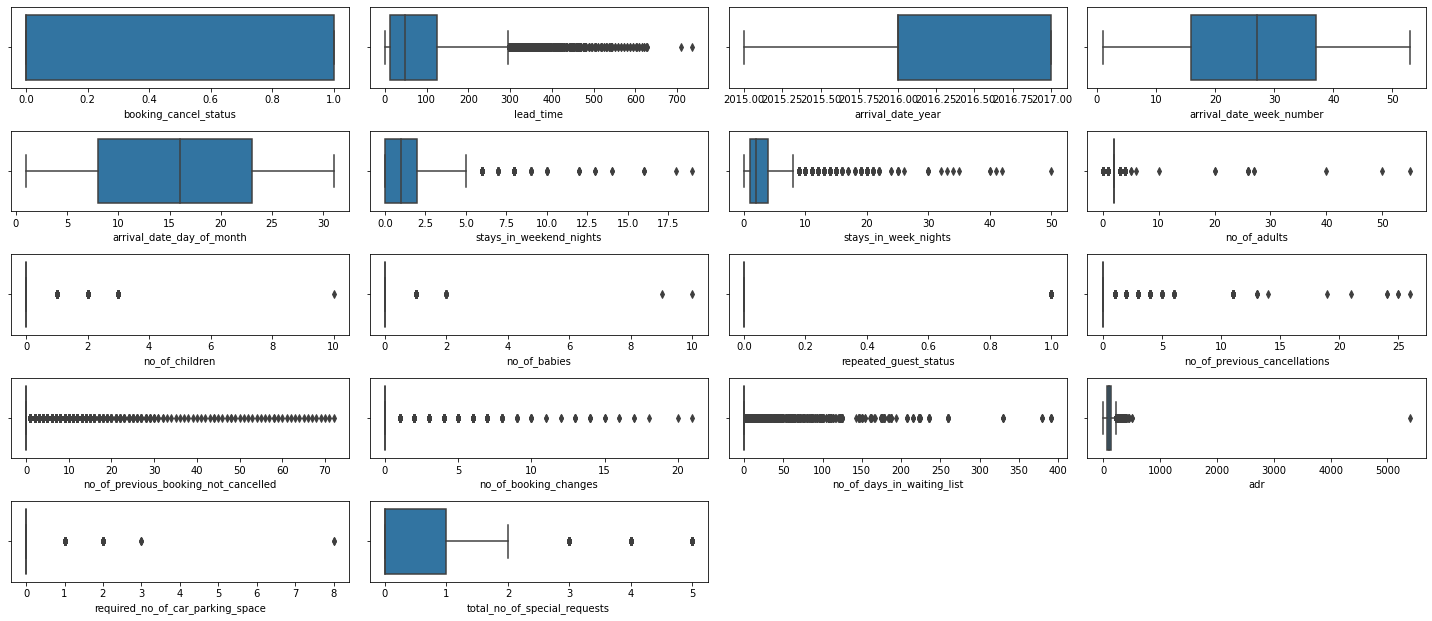

In [33]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
x = 1 

for column in df1.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df1[column])
    x+=1
    
plt.tight_layout()

--> There are many outliers in our dataset

--> There is negative amount of ADR


--> We will drop the Adr outlier because there is only one value which is random, so we will not consider it into our analysis

In [34]:
# Treating ADR outlier
df1[df1['adr'] <0]


,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,assigned_room_type,no_of_booking_changes,deposit_type,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [ ]:
# Dropping the ADR values which are less than 0
df1 = df1.drop(df1[df1.adr < 0].index)
df1[df1['adr'] < 0]


In [ ]:
# Dropping the ADR value more than 5000
df1 = df1.drop(df1[df1.adr > 5000].index)
df1[df1['adr']> 5000]

7. Merging the columns for better insights

In [41]:
#  Creating a column of total_no_in_group
df1['total_no_in_group'] =df1['no_of_adults'] + df1['no_of_children'] +df1['no_of_babies']

In [42]:
# Creating a column of total_no_of_stays
df1['total_no_of_stays']=df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

In [43]:
# checking our dataset
df1.iloc[:15,4:] 

,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,no_of_children,no_of_babies,meal_type,country,...,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,arrival_month_year,total_no_in_group,total_no_of_stays
0,July,27,1,0,0,2,0,0,BB,PRT,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
1,July,27,1,0,0,2,0,0,BB,PRT,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
2,July,27,1,0,1,1,0,0,BB,GBR,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,July,27,1,0,1,1,0,0,BB,GBR,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,July,27,1,0,2,2,0,0,BB,GBR,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2
6,July,27,1,0,2,2,0,0,BB,PRT,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07-01,2,2
7,July,27,1,0,2,2,0,0,FB,PRT,...,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2
8,July,27,1,0,3,2,0,0,BB,PRT,...,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-01,2,3
9,July,27,1,0,3,2,0,0,HB,PRT,...,0,Transient,105.50,0,0,Canceled,2015-04-22,2015-07-01,2,3
10,July,27,1,0,4,2,0,0,BB,PRT,...,0,Transient,123.00,0,0,Canceled,2015-06-23,2015-07-01,2,4


Exploratory Data analysis and Visualization

showing the correlation between columns

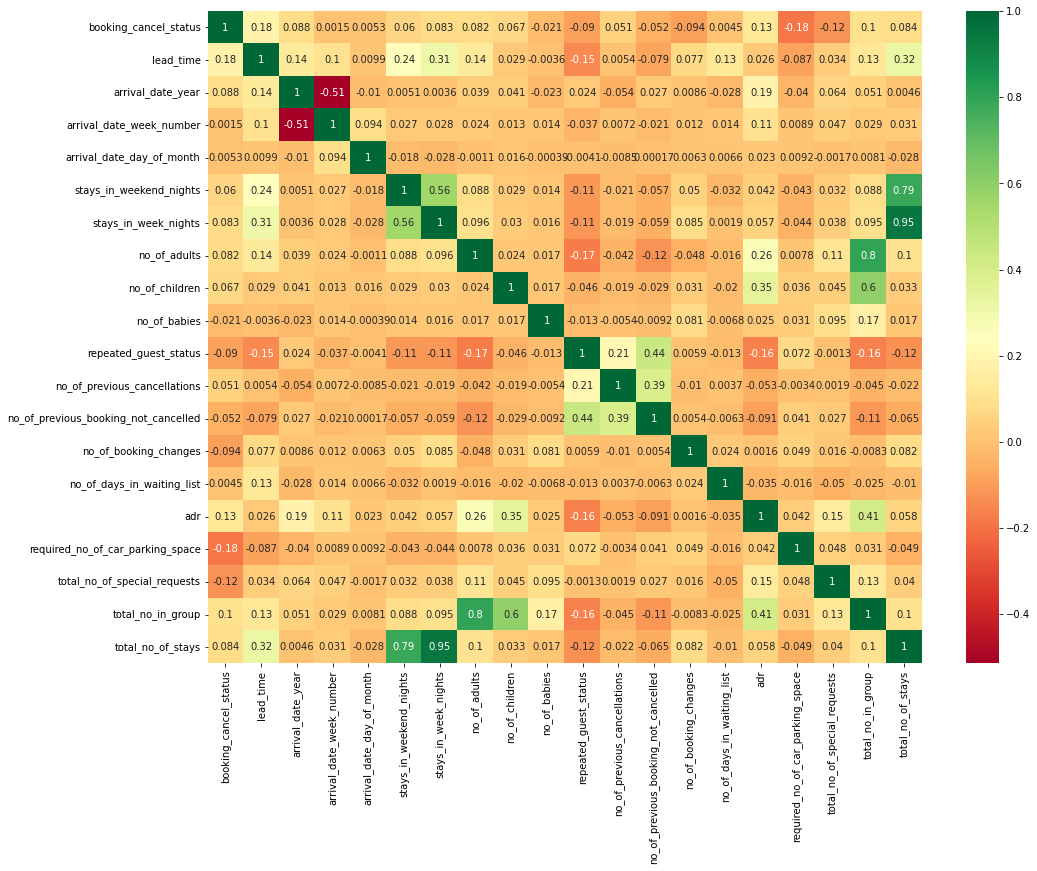

In [45]:
#correlation
plt.figure(figsize=(16,12))
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn')

#Analysis on the Basis of columns
1. Analysis on the basis of hotel
2. Analysis on the basis of booking and cancellation
3. Analysis on the basis of adr(average daily rate)
4. Analysis on the basis of distribution channel
5. Analysis on the basis of deposit type
6. Analysis on the basis of meal type
7. Analysis on the basis of room type
8. Analysis on the basis of country

#1. Analysis on the basis of Hotel

1.   Which hotel type prefered the most?
2.   which hotel has a higher booking cancellation rate?
3.   How long do people prefer to stay in both hotels?
4.   Which hotel require more car parking spaces?
5.   Which hotel generates the most revenue?
6.   Which are the busiest months for hotel?
7.   Which hotel has the higher lead time?
8.   Was a hotel likely top recieve a disproportionately high number of special requests?

                        1. Which hotel type is preferred the most?



In [46]:
# Unique values in the hotel column
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Data visualization through pie chart

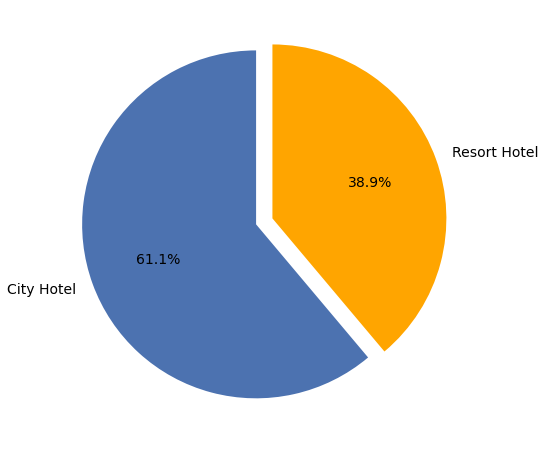

In [47]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df1['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df1['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['#4c72b0', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

--> 61% of people prefer city Hotels 
and 39% of people prefer resort hotels

--> It might be possible because of the pricing factor and the location of the hotel 

--> We can also assume that the city hotel is more popular than resort hotel


                            2.Lets analyse the fluctuation in prices during each of the months

In [ ]:
df['no_of_babies']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: no_of_babies, Length: 119388, dtype: int64

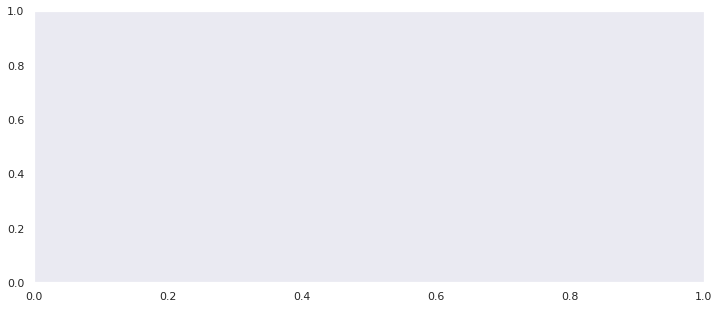

In [ ]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_per_person'] = df['average_daily_rate'] / (df['no_of_adults'] + df['no_of_children']) 
actual_guests = df.loc[df["booking_cancel_status"] == '0']
actual_guests['price'] = actual_guests['average_daily_rate'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()



--> There are more fluctuations in price of Resort hotels as      compared to the city hotels

--> The price of resort hotels are higher as compared to the city hotels

                           3. Visualising monthly bookings and monthly cancellations

In [ ]:
# taking different values of months count into account.
df_copy= df.copy()
df_copy['no_of_bookings']= 1
df_copy.loc[(df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy.sample(100)

,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,deposit_type,no_of_days_in_waiting_list,customer_type,average_daily_rate,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,adr_per_person,no_of_bookings
71443,City Hotel,1,184,2017,July,27,5,1,4,2,...,No Deposit,0,Transient,107.10,0,0,Canceled,2017-01-12,53.550,0.333333
31403,Resort Hotel,0,98,2016,December,53,27,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2016-12-27,0.000,0.500000
31184,Resort Hotel,0,0,2016,December,51,16,0,2,2,...,No Deposit,0,Transient,45.60,0,1,Check-Out,2016-12-18,22.800,0.500000
36212,Resort Hotel,0,256,2017,May,19,7,2,5,2,...,No Deposit,0,Contract,70.95,0,0,Check-Out,2017-05-14,35.475,0.500000
108849,City Hotel,0,72,2017,March,13,27,2,5,2,...,No Deposit,0,Transient,109.16,0,0,Check-Out,2017-04-03,54.580,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55244,City Hotel,1,198,2016,August,33,8,1,4,2,...,No Deposit,0,Transient,99.95,0,0,Canceled,2016-03-29,49.975,0.333333
6655,Resort Hotel,0,322,2016,June,26,22,0,3,2,...,No Deposit,75,Transient-Party,92.00,0,0,Check-Out,2016-06-25,46.000,0.500000
91325,City Hotel,0,1,2016,June,25,17,1,2,2,...,No Deposit,0,Transient-Party,75.00,0,1,Check-Out,2016-06-20,37.500,0.500000
47799,City Hotel,1,19,2016,March,10,4,0,2,2,...,No Deposit,0,Transient,111.00,0,0,Canceled,2016-02-16,55.500,0.500000


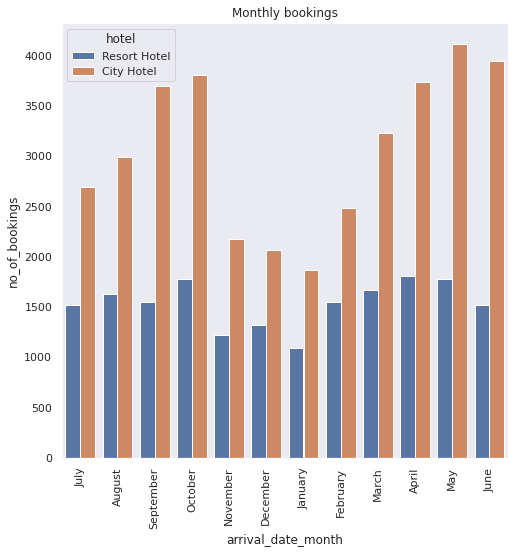

In [ ]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly bookings")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy)
plt.xticks(rotation = 90)
plt.show()

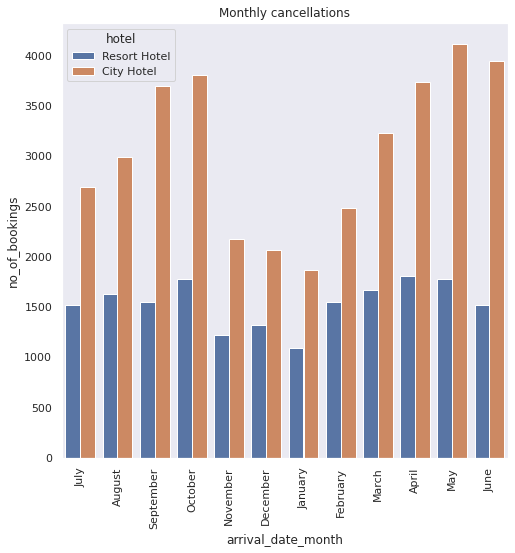

In [ ]:
df_copy1= df.copy()
df_copy1['no_of_bookings']= 1
df_copy1.loc[(df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy1.loc[~((df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy1.sample(100)
b= df_copy1[df_copy1.booking_cancel_status == 1]
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.set(style="dark")
plt.title("Monthly cancellations")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy1['hotel'], estimator= sum, data= df_copy1)
plt.xticks(rotation = 90)
plt.show()

--> In City hotels bookings and cancellations are high during the months of  May , September and October


--> In case of resort hotels there is not much variations in bookings and cancellations. Bookings and cancellations are highest during the month of October

                                   4. Relationship between lead time and cancellations

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

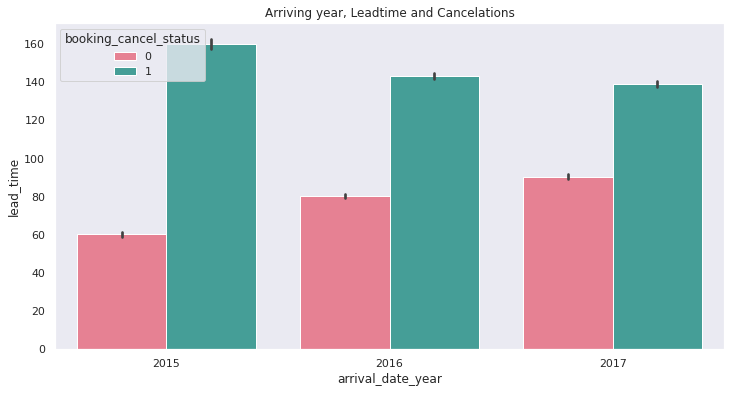

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='booking_cancel_status', data= df, palette='husl')
plt.title('Arriving year, Leadtime and Cancelations')

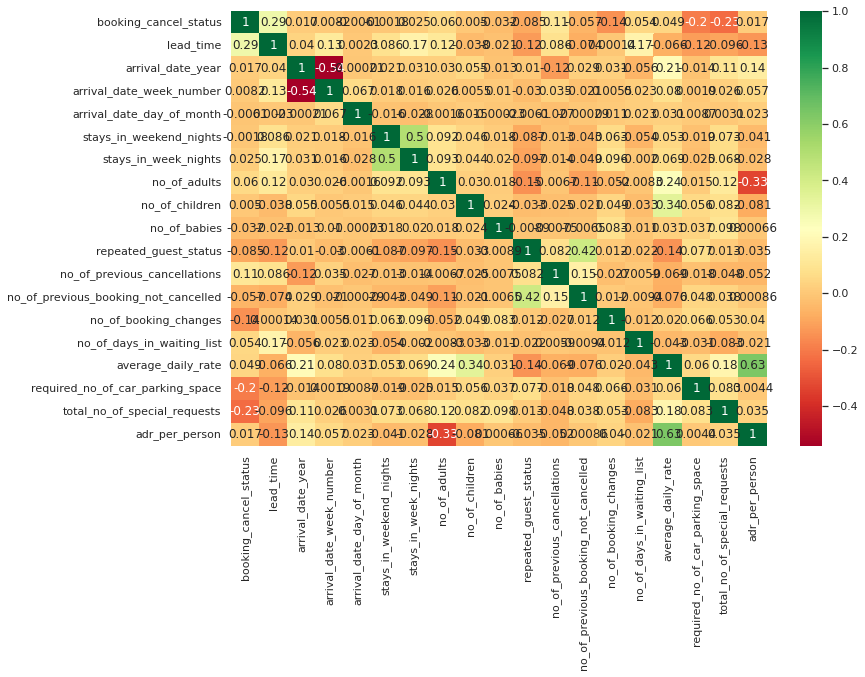

In [ ]:
#correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

There is a positive correlation between the lead time and the booking cancellation

                      5.  Analysing which deposit type is preffered the most

In [ ]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

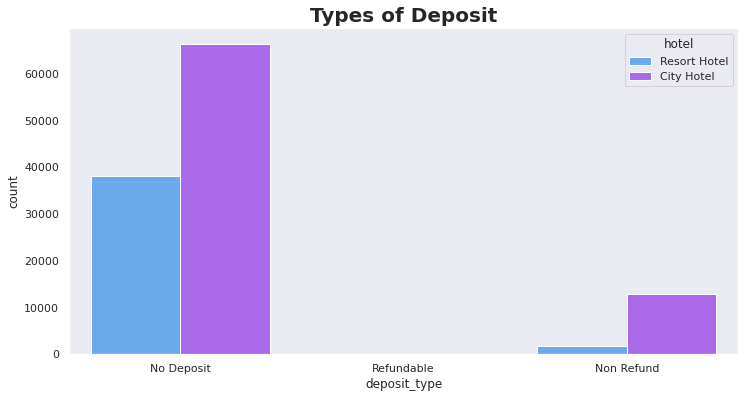

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data = df , x = 'deposit_type', hue='hotel', palette='cool')
plt.title('Types of Deposit',fontweight="bold", size=20)


plt.show()

Was a hotel likely top recieve a disproportionately high number of special requests?

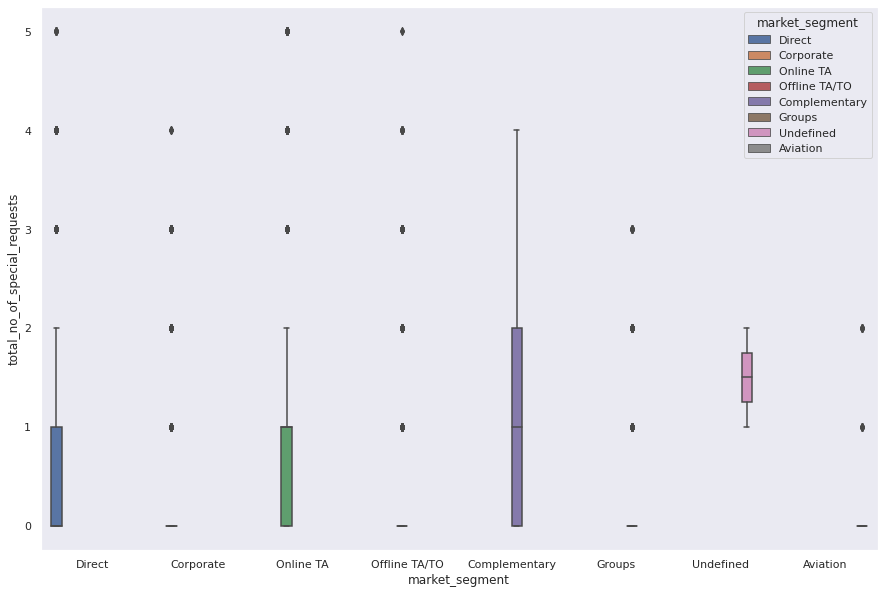

In [ ]:
#Special request acoording to market segment
sns.boxplot(x="market_segment", y="total_no_of_special_requests",hue='market_segment',data= df)

fig = plt.gcf()
fig.set_size_inches(15,10)

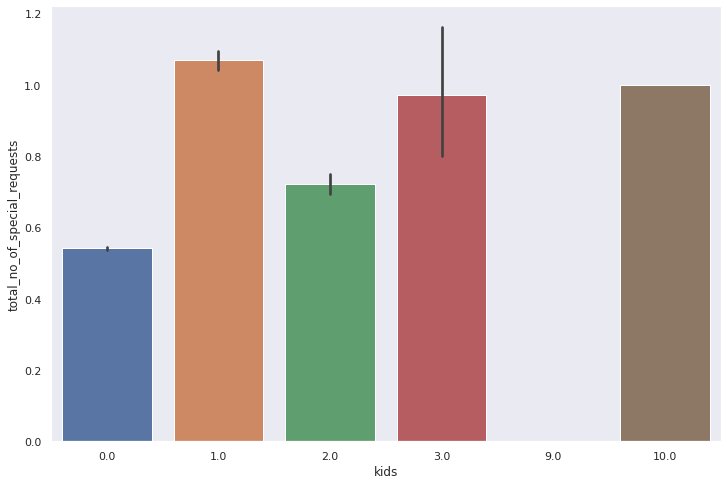

In [ ]:
#Special requests on the basis of number of kid.
df['kids'] = df['no_of_children']+df['no_of_babies']
sns.barplot(x="kids", y="total_no_of_special_requests",data= df)
fig = plt.gcf()
fig.set_size_inches(12,8)

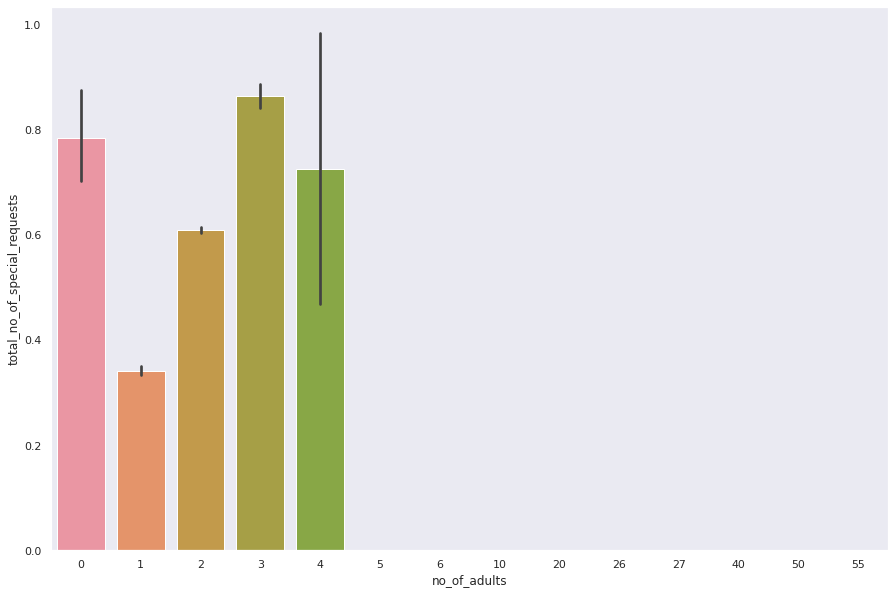

In [ ]:
#Special request on the basis of number of adults.
sns.barplot(x="no_of_adults", y="total_no_of_special_requests",data= df)
fig = plt.gcf()
fig.set_size_inches(15,10)

Relationship between ADR and the total number of stays 

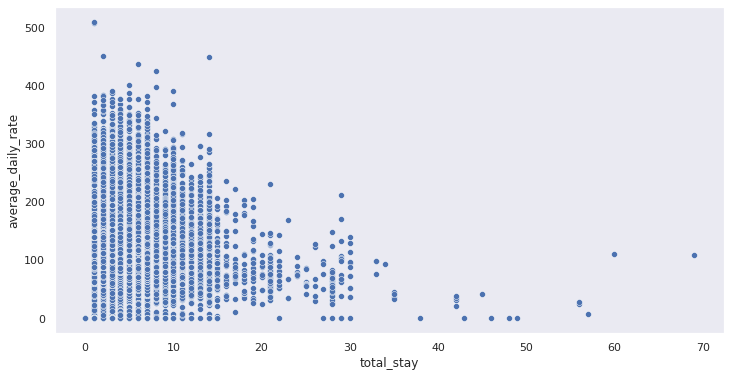

In [ ]:
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'average_daily_rate', x = 'total_stay', data = df)
plt.show()

There is a negative correlation between the TOtal stay and the AdR, which means as the length of tottal_stay increases the adr decreases.
